# Snow Prediction 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%load_ext nb_black

<IPython.core.display.Javascript object>

Arapahoe Basin and Loveland compete yearly for the #RaceToOpen. Ski enthusiasts from around the world watch to see who will open first. Below are the opening dates during the Snowmaking Era.[citation needed]

Season Open Date (Day of Week)

    2003-2004 October 30 (Thursday)
    2004-2005 October 22 (Friday)
    2005-2006 October 23 (Friday)
    2006-2007 October 13 (Friday)
    2007-2008 October 10 (Wednesday)
    2008-2009 October 15 (Wednesday)
    2009-2010 October 9 (Friday) *Earliest opening
    2010-2011 October 25 (Monday)
    2011-2012 October 13 (Thursday)
    2012-2013 October 17 (Wednesday)
    2013-2014 October 13 (Sunday)
    2014-2015 October 17 (Friday)
    2015-2016 October 29 (Thursday)
    2016-2017 October 21 (Friday)
    2017-2018 October 13 (Friday)
    2018-2019 October 19 (Friday)
    2019-2020 October 11 (Friday)
    2020-2021 November 9 (Monday)
    2021-2022 October 17 (Sunday)
    2022-2023 October 23 (Sunday)

Zuma Bowl Opening and Closing Dates

Season Open Date Close Date Total Days Open for Zuma Bowl

    2007-8 January 12, 2008 - May 22, 2008 - 132 Days
    2008-9 December 30, 2008 - May 14, 2009 - 136 Days
    2009-10 February 24, 2010 - May 16, 2010 - 82 Days
    2010-11 December 18, 2010 - June 5, 2011 - 170 Days
    2011-12 February 24, 2012 - March 25, 2012 - 31 Days
    2012-13 February 13, 2013 - May 27, 2013 - 104 Days
    2013-14 January 10, 2014 - June 1, 2014 - 143 Days
    2014-15 December 29, 2014 - June 3, 2015 - 157 Days
    2015-16 December 23, 2015 - June 3, 2016 - 164 Days
    2016-17 December 23, 2016 - June 3, 2017 - 164 Days
    2017-18 January 13, 2018 - May 16, 2018
    2018-19 December 7, 2018 - TBD
        2019-20 Closed EARLY DUE TO COVID, Reopened partial mountain with reservations June 1st.
    2020-21 - TBD
    2021-22 TBD - May 7th

In [45]:
opening_dates = [
    "2003 October 30",
    "2004 October 22",
    "2005 October 23",
    "2006 October 13",
    "2007 October 10",
    "2008 October 15",
    "2009 October 9",
    "2010 October 25",
    "2011 October 13",
    "2012 October 17",
    "2013 October 13",
    "2014 October 17",
    "2015 October 29",
    "2016 October 21",
    "2017 October 13",
    "2018 October 19",
    "2019 October 11",
    "2020 November 9",
    "2021 October 17",
    "2022 October 23",
]

<IPython.core.display.Javascript object>

In [81]:
# df = pd.read_csv("/Users/rory/Downloads/3505926.csv")
df = pd.read_csv("/Users/rory/Downloads/grizzly_extract.csv")
df = df[df.NAME == "GRIZZLY PEAK, CO US"]
df = df.drop(columns=["ELEVATION", "PRCP_ATTRIBUTES"])
df["DATE"] = pd.to_datetime(df.DATE)
df

,STATION,NAME,DATE,PRCP,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,WESD
30526,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-01,0.0,25.0,",,T",18.0,",,T",28.0,",,T",13.0,",,T",13.0,5.0
30527,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-02,0.1,24.0,",,T",21.0,",,T",32.0,",,T",13.0,",,T",19.0,4.8
30528,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-03,0.1,24.0,",,T",23.0,",,T",33.0,",,T",15.0,",,T",26.0,4.9
30529,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-04,0.1,97.0,",G,T",25.0,",,T",30.0,",,T",17.0,",,T",17.0,5.0
30530,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-05,0.4,33.0,",,T",15.0,",,T",19.0,",,T",10.0,",,T",10.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37398,USS0005K09S,"GRIZZLY PEAK, CO US",2023-10-26,0.1,0.0,",,T",35.0,",,T",49.0,",,T",26.0,",,T",28.0,0.0
37399,USS0005K09S,"GRIZZLY PEAK, CO US",2023-10-27,0.0,0.0,",,T",33.0,",,T",42.0,",,T",26.0,",,T",31.0,0.0
37400,USS0005K09S,"GRIZZLY PEAK, CO US",2023-10-28,0.8,8.0,",,T",27.0,",,T",32.0,",,T",19.0,",,T",21.0,0.8
37401,USS0005K09S,"GRIZZLY PEAK, CO US",2023-10-29,0.0,10.0,",,T",14.0,",,T",24.0,",,T",0.0,",,T",1.0,0.8


<IPython.core.display.Javascript object>

In [109]:
year_to_opening = {x.year: x.day_of_year for x in pd.to_datetime(opening_dates)}


df["Opening Day"] = df.DATE.dt.year.map(year_to_opening)

<IPython.core.display.Javascript object>

In [110]:
df.dropna()

,STATION,NAME,DATE,PRCP,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,WESD,Opening Day
30526,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-01,0.0,25.0,",,T",18.0,",,T",28.0,",,T",13.0,",,T",13.0,5.0,296.0
30527,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-02,0.1,24.0,",,T",21.0,",,T",32.0,",,T",13.0,",,T",19.0,4.8,296.0
30528,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-03,0.1,24.0,",,T",23.0,",,T",33.0,",,T",15.0,",,T",26.0,4.9,296.0
30529,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-04,0.1,97.0,",G,T",25.0,",,T",30.0,",,T",17.0,",,T",17.0,5.0,296.0
30530,USS0005K09S,"GRIZZLY PEAK, CO US",2005-01-05,0.4,33.0,",,T",15.0,",,T",19.0,",,T",10.0,",,T",10.0,5.6,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37095,USS0005K09S,"GRIZZLY PEAK, CO US",2022-12-27,0.3,39.0,",,T",29.0,",,T",36.0,",,T",24.0,",,T",26.0,7.2,296.0
37096,USS0005K09S,"GRIZZLY PEAK, CO US",2022-12-28,0.1,39.0,",,T",23.0,",,T",29.0,",,T",13.0,",,T",13.0,7.4,296.0
37097,USS0005K09S,"GRIZZLY PEAK, CO US",2022-12-29,0.0,34.0,",,T",8.0,",,T",13.0,",,T",3.0,",,T",3.0,7.4,296.0
37098,USS0005K09S,"GRIZZLY PEAK, CO US",2022-12-30,0.1,38.0,",,T",14.0,",,T",21.0,",,T",3.0,",,T",19.0,7.5,296.0


<IPython.core.display.Javascript object>

In [111]:
data = df[["PRCP", "SNWD", "Opening Day"]].dropna()
data

,PRCP,SNWD,Opening Day
30526,0.0,25.0,296.0
30527,0.1,24.0,296.0
30528,0.1,24.0,296.0
30529,0.1,97.0,296.0
30530,0.4,33.0,296.0
...,...,...,...
37095,0.3,39.0,296.0
37096,0.1,39.0,296.0
37097,0.0,34.0,296.0
37098,0.1,38.0,296.0


<IPython.core.display.Javascript object>

In [112]:
X = data[["PRCP", "SNWD"]]
y_open = data["Opening Day"]

<IPython.core.display.Javascript object>

In [113]:
# y_close = data['Closing Day']

# Split the data into training and testing sets
(
    X_train,
    X_test,
    y_open_train,
    y_open_test,
) = train_test_split(X, y_open, test_size=0.2, random_state=42)

# Create separate models for opening and closing days
open_model = LinearRegression()
# close_model = LinearRegression()

# Train the models
open_model.fit(X_train, y_open_train)
# close_model.fit(X_train, y_close_train)

# Make predictions on the test set
open_predictions = open_model.predict(X_test)
# close_predictions = close_model.predict(X_test)

# Evaluate the model using mean squared error
open_mse = mean_squared_error(y_open_test, open_predictions)
# close_mse = mean_squared_error(y_close_test, close_predictions)

print("Root Mean Squared Error for Opening Days:", open_mse**0.5)
# print("Mean Squared Error for Closing Days:", close_mse)

Root Mean Squared Error for Opening Days: 7.610856633379375


<IPython.core.display.Javascript object>

In [114]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Opening Day', ylabel='PRCP'>

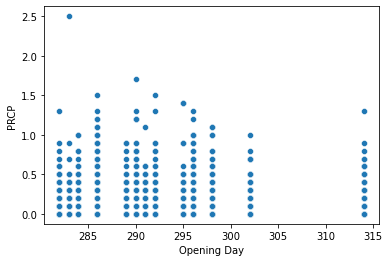

<IPython.core.display.Javascript object>

In [116]:
sns.scatterplot(data=data, y="PRCP", x="Opening Day")

In [82]:
import requests
import json
from datetime import datetime

# API URL for Grizzly Peak weather data
url = "https://api.weather.gov/stations/GPLO3/observations/latest"

# Make request to API
response = requests.get(url)

# Check response status code
if response.status_code == 200:
    # Parse JSON response
    data = json.loads(response.text)

    # Get observation timestamp
    observation_time = datetime.strptime(
        data["properties"]["timestamp"], "%Y-%m-%dT%H:%M:%S%z"
    )

    # Get current weather conditions
    weather_main = data["properties"]["textDescription"]

    # Print the data
    print(
        "Current weather at Grizzly Peak (as of {}): {}".format(
            observation_time.strftime("%Y-%m-%d %H:%M:%S"), weather_main
        )
    )
else:
    print(
        "Error occurred while fetching data. Status code: {}".format(
            response.status_code
        )
    )

Error occurred while fetching data. Status code: 404


<IPython.core.display.Javascript object>

In [84]:
r = requests.get("https://api.weather.gov/stations")

<IPython.core.display.Javascript object>

In [89]:
data = r.json()

<IPython.core.display.Javascript object>

In [95]:
data["features"]

[{'id': 'https://api.weather.gov/stations/0002W',
  'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-84.22366, 30.53842]},
  'properties': {'@id': 'https://api.weather.gov/stations/0002W',
   '@type': 'wx:ObservationStation',
   'elevation': {'unitCode': 'wmoUnit:m', 'value': 47.8536},
   'stationIdentifier': '0002W',
   'name': 'DeSoto Trail Elementary',
   'timeZone': 'America/New_York',
   'forecast': 'https://api.weather.gov/zones/forecast/FLZ017',
   'county': 'https://api.weather.gov/zones/county/FLC073',
   'fireWeatherZone': 'https://api.weather.gov/zones/fire/FLZ017'}},
 {'id': 'https://api.weather.gov/stations/0004W',
  'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-84.24158, 30.60794]},
  'properties': {'@id': 'https://api.weather.gov/stations/0004W',
   '@type': 'wx:ObservationStation',
   'elevation': {'unitCode': 'wmoUnit:m', 'value': 64.008},
   'stationIdentifier': '0004W',
   'name': 'Deerlake Middle',
   'timeZone': 'America/New

<IPython.core.display.Javascript object>

In [99]:
for x in data["features"]:
    #     print(x["properties"]["name"])
    print(x["properties"]["timeZone"])

America/New_York
America/New_York
America/New_York
America/New_York
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/New_York
Pacific/Honolulu
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
Pacific/Honolulu
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/New_York
Pacific/Honolulu
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/New_York
America/New_York
America/New_York
America/New_York
America/New_York
America/Chicago
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/New_York
America/New_York
America/New_York
Pacific/Honolulu
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/New_York
America/New_York
America/New_York
America/Chicago
Pacific/Honolulu
America/New_York
America/Los_Angeles
America/Los_Angeles
America/New_York
America/Chicago
Pacific/Honolulu
America/New_York
America/Los_Angeles
Americ

<IPython.core.display.Javascript object>

In [102]:
set([x["properties"]["timeZone"] for x in data["features"]])

{'America/Chicago',
 'America/Detroit',
 'America/Indiana/Indianapolis',
 'America/Los_Angeles',
 'America/New_York',
 'Pacific/Honolulu'}

<IPython.core.display.Javascript object>